## Import liabraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## read the data

In [2]:
claimants = pd.read_csv('..\datasets\claimants.csv')

## Do the Prelimnary examinations

In [3]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


## Handle the null value 

+ replacing character data by 'mode'
+ and conitinus data by median

In [5]:
df = claimants.copy()

In [6]:
df['CLMSEX'].fillna(df['CLMSEX'].mode()[0],inplace = True)

In [7]:
df['CLMINSUR'].fillna(df['CLMINSUR'].mode()[0],inplace = True)

In [8]:
df['SEATBELT'].fillna(df['SEATBELT'].mode()[0],inplace = True)

## Checking what to fill na with mean or mode ? for numerical data 

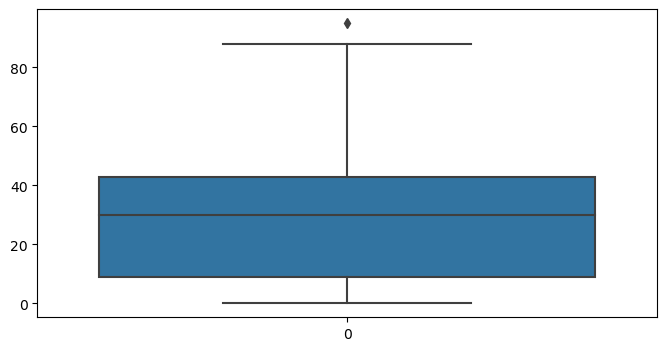

In [9]:
plt.figure(figsize = (8,4))
sns.boxplot(data = df['CLMAGE'])
plt.show()

## age seems to have an outlier value hence going for median 

In [10]:
df['CLMAGE'].fillna(df['CLMAGE'].median(),inplace = True)

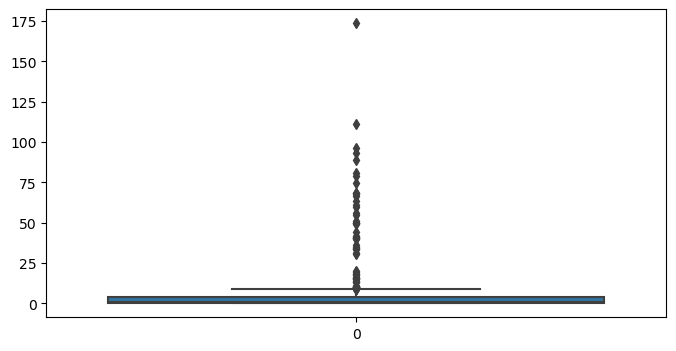

In [11]:
plt.figure(figsize = (8,4))
sns.boxplot(data = df['LOSS'])
plt.show()

## Full of outlier values hence going for median

In [12]:
df['LOSS'].fillna(df['LOSS'].median(),inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1340 non-null   float64
 3   CLMINSUR  1340 non-null   float64
 4   SEATBELT  1340 non-null   float64
 5   CLMAGE    1340 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


## Split data into X and y

+ Will Hire autorney being dependent column
+ Taking the following column as independent

In [14]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


## Spliting Data into X and y

In [15]:
y = df.iloc[:,1]

In [16]:
X = df.iloc[:,2:]

In [17]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [18]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


## Split the Data into train and test now 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Y_train,Y_test,X_train,X_test = train_test_split(y,X,test_size=0.2,random_state=42)

In [21]:
Y_train.shape,Y_test.shape,X_train.shape,X_test.shape

((1072,), (268,), (1072, 5), (268, 5))

## Build the model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clm = LogisticRegression()

In [24]:
clm.fit(X_train,Y_train)

LogisticRegression()

## First Predit the training data and print Training Matrices

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [26]:
yhat_train = clm.predict(X_train)

## View the confusion matrix for yhat_train

In [28]:
confusion_matrix(Y_train,yhat_train)

array([[352, 205],
       [113, 402]], dtype=int64)

In [30]:
print(classification_report(Y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       557
           1       0.66      0.78      0.72       515

    accuracy                           0.70      1072
   macro avg       0.71      0.71      0.70      1072
weighted avg       0.71      0.70      0.70      1072



In [31]:
train_proba = clm.predict_proba(X_train)

## Prdicting the probability of various occurances for yhat_train

In [32]:
train_proba[:,1][1:10]

array([2.03364525e-20, 5.35092350e-01, 6.85697639e-01, 1.48057942e-02,
       5.98682866e-01, 5.69807904e-01, 1.65559808e-01, 6.57962138e-01,
       1.57990519e-01])

In [33]:
train_proba[:,0][1:10]

array([1.        , 0.46490765, 0.31430236, 0.98519421, 0.40131713,
       0.4301921 , 0.83444019, 0.34203786, 0.84200948])

## Ploting the ROC curve for yhat_train

Text(0, 0.5, 'True Positive Rate')

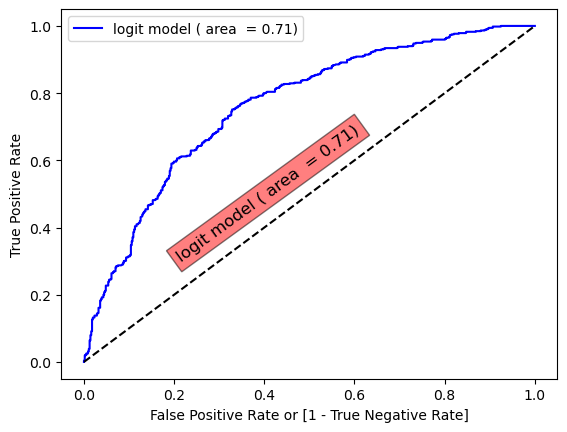

In [51]:
fpr, tpr, thresholds = roc_curve(Y_train, clm.predict_proba(X_train)[:,1])

auc = roc_auc_score(Y_train, yhat_train)

plt.plot(fpr, tpr, 
         color='blue', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 36,
        bbox = dict(facecolor = 'red', alpha = 0.5))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Pedict for testing data and get testing metrics

In [52]:
yhat_test = clm.predict(X_test)

+ Confusion matrix for testing data

In [53]:
confusion_matrix(Y_test,yhat_test)

array([[ 85,  43],
       [ 27, 113]], dtype=int64)

In [55]:
print(classification_report(Y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       128
           1       0.72      0.81      0.76       140

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



In [56]:
test_proba = clm.predict_proba(X_test)

In [58]:
print(test_proba[:,1][1:10])

[0.12340466 0.7013938  0.61554873 0.1702567  0.35907636 0.60109892
 0.54536451 0.55707902 0.12090191]


In [64]:
Y_test.shape,yhat_test.shape,clm.predict_proba(X_test).shape

((268,), (268,), (268, 2))

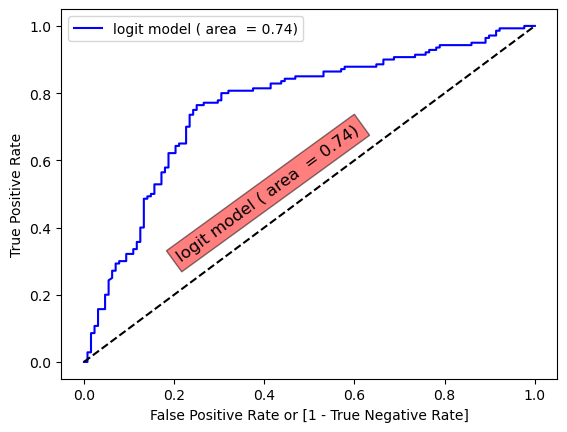

In [66]:
fpr, tpr, thresholds = roc_curve(Y_test, clm.predict_proba(X_test)[:,1])

auc = roc_auc_score(Y_test, yhat_test)

plt.plot(fpr, tpr, 
         color='blue', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 36,
        bbox = dict(facecolor = 'red', alpha = 0.5))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()